In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from statsmodels import regression
import statsmodels.api as sm
import xlsxwriter

In [2]:
data = pd.read_excel("Daily_Currency_Prices.xlsx",index_col=0,skiprows=0)

In [3]:
data.tail(10)

,JPY,AUD,NZD,EUR,GBP,CAD,CHF,TWD,CNY,INR,...,HKD,PHP,SGD,THB,KRW,IDR,MYR,VND,TRY,KHR
Date,,,,,,,,,,,,,,,,,,,,,
2023-04-17,0.007437,0.6700,0.6180,1.0926,1.2374,0.746714,1.112966,0.032749,0.145378,0.012198,...,0.127402,0.017883,0.749625,0.028994,0.000758,0.000068,0.226296,0.000043,0.051583,0.000247
2023-04-18,0.007458,0.6722,0.6207,1.0971,1.2424,0.746993,1.116071,0.032804,0.145444,0.012183,...,0.127390,0.017809,0.750469,0.029172,0.000758,0.000067,0.225632,0.000043,0.051584,0.000247
2023-04-19,0.007424,0.6713,0.6198,1.0954,1.2438,0.742942,1.114330,0.032704,0.145243,0.012156,...,0.127395,0.017730,0.749457,0.029036,0.000752,0.000067,0.225225,0.000043,0.051585,0.000246
2023-04-20,0.007450,0.6740,0.6170,1.0967,1.2443,0.742170,1.120951,0.032770,0.145507,0.012177,...,0.127395,0.017895,0.750751,0.029129,0.000756,0.000067,0.225479,0.000043,0.051544,0.000246
2023-04-21,0.007454,0.6690,0.6133,1.0987,1.2430,0.738607,1.120323,0.032653,0.145096,0.012191,...,0.127429,0.017895,0.749457,0.029112,0.000752,0.000067,0.225479,0.000043,0.051615,0.000246
2023-04-24,0.007450,0.6696,0.6166,1.1041,1.2482,0.738607,1.127015,0.032629,0.145016,0.012203,...,0.127403,0.017969,0.749963,0.029121,0.000750,0.000067,0.225479,0.000043,0.051517,0.000245
2023-04-25,0.007479,0.6625,0.6136,1.0972,1.2408,0.733945,1.121453,0.032565,0.144252,0.012200,...,0.127395,0.018012,0.747049,0.029070,0.000746,0.000067,0.225073,0.000043,0.051481,0.000245
2023-04-26,0.007482,0.6598,0.6116,1.1040,1.2467,0.733407,1.122209,0.032553,0.144381,0.012234,...,0.127398,0.017966,0.748839,0.029291,0.000747,0.000067,0.224467,0.000043,0.051554,0.000244
2023-04-27,0.007466,0.6629,0.6147,1.1027,1.2487,0.735781,1.118443,0.032575,0.144467,0.012241,...,0.127397,0.017950,0.749400,0.029291,0.000747,0.000068,0.224215,0.000043,0.051456,0.000244


In [4]:
data.describe()

,JPY,AUD,NZD,EUR,GBP,CAD,CHF,TWD,CNY,INR,...,HKD,PHP,SGD,THB,KRW,IDR,MYR,VND,TRY,KHR
count,2694.000000,2694.000000,2694.000000,2694.000000,2694.000000,2694.000000,2694.000000,2694.000000,2694.000000,2694.000000,...,2694.000000,2694.000000,2694.000000,2694.000000,2694.000000,2694.000000,2694.000000,2694.000000,2694.000000,2694.000000
mean,0.009003,0.768279,0.707633,1.165312,1.383935,0.800719,1.049691,0.033110,0.152592,0.014721,...,0.128430,0.020549,0.743939,0.030528,0.000874,0.000075,0.254435,0.000044,0.260374,0.000248
std,0.000783,0.092921,0.069167,0.095239,0.143248,0.073630,0.041224,0.001436,0.007304,0.001447,...,0.000621,0.001683,0.029053,0.001711,0.000054,0.000009,0.030667,0.000002,0.148880,0.000002
min,0.006660,0.574100,0.556300,0.959200,1.068400,0.686059,0.970591,0.029660,0.136958,0.012046,...,0.127390,0.016926,0.685307,0.026123,0.000692,0.000060,0.210704,0.000040,0.051420,0.000242
25%,0.008687,0.709400,0.659900,1.101600,1.279300,0.753196,1.013582,0.032278,0.145618,0.013582,...,0.127818,0.019314,0.725426,0.029123,0.000843,0.000070,0.235967,0.000043,0.136109,0.000246
50%,0.009090,0.745100,0.694550,1.136100,1.337350,0.774773,1.041016,0.033072,0.152672,0.014744,...,0.128773,0.020093,0.737790,0.030604,0.000882,0.000072,0.241779,0.000044,0.257053,0.000247
75%,0.009455,0.782775,0.732275,1.210350,1.514150,0.805964,1.084217,0.033793,0.159684,0.015660,...,0.128969,0.021905,0.753963,0.031867,0.000907,0.000076,0.261397,0.000046,0.360338,0.000249
max,0.011538,1.059500,0.882000,1.393300,1.716300,1.017294,1.166589,0.036353,0.165557,0.018861,...,0.129046,0.024691,0.819605,0.034977,0.000991,0.000104,0.337610,0.000048,0.572967,0.000259


In [5]:
#Put the data into a dataframe
df_data=pd.DataFrame(data) ###DATAFRAME USED TO ACCELERATE THE ANALITICS

In [6]:
# Plot and save individual time series  #####CHECK RECORDING ON 1H09
for col in data.iteritems():
    print('plotting '+col[0])
    
    # create a new figure and axis
    fig, ax = plt.subplots()
    
    # extract the column data and plot it
    indicator = data[col[0]]
    ax.plot(indicator, alpha=0.9, color='#009ACD')
    
    # add x and y axis labels and a title
    ax.set_xlabel('Date')
    ax.set_ylabel(col[0])
    ax.set_title('Historic Prices: ' + col[0])
    
    # save the plot to a file and close the figure
    plt.savefig('Historic_price_'+col[0]+'.png')
    plt.close()

plotting JPY
plotting AUD
plotting NZD
plotting EUR
plotting GBP
plotting CAD
plotting CHF
plotting TWD
plotting CNY
plotting INR
plotting RUB
plotting HKD
plotting PHP
plotting SGD
plotting THB
plotting KRW
plotting IDR
plotting MYR
plotting VND
plotting TRY
plotting KHR


In [7]:
## Data on the 16th and 17th April 2014 was considered an outlier and an adjustment was made. Instead of making values=0,
#the average between the two values surrounding these days (15-04-2014 and 18-04-2014) was put instead of the original values

print('Before Adjustment',data['KHR'][336:338])
data['KHR'][336:338] = 0.000253
print('-------------')
print('After Adjustment',data['KHR'][336:338])


Before Adjustment Date
2014-04-16    0.000259
2014-04-17    0.000258
Name: KHR, dtype: float64
-------------
After Adjustment Date
2014-04-16    0.000253
2014-04-17    0.000253
Name: KHR, dtype: float64


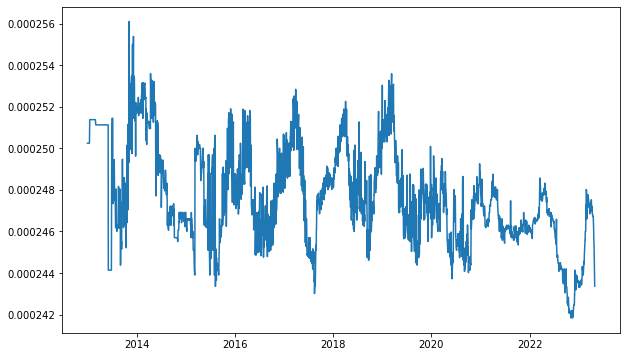

In [8]:
# plot one series
plt.figure(figsize=(10, 6))
plt.plot(data['KHR'])
plt.show()


In [9]:
################################################ RETURN CALCULATION ########################################################

returns = {}
for col in data.columns:
    returns[col] = data[col].pct_change().dropna()

In [10]:
################################################### CALCULATIONS OF RETURNS ###############################################
###### LONG CODE#### SIMPLIFIED IS ABOVE
#JPY_returns = data['JPY'].pct_change().dropna()
#AUD_returns = data['AUD'].pct_change().dropna()
#NZD_returns = data['NZD'].pct_change().dropna()
#EUR_returns = data['EUR'].pct_change().dropna()
#GBP_returns = data['GBP'].pct_change().dropna()
#CAD_returns = data['CAD'].pct_change().dropna()
#CHF_returns = data['CHF'].pct_change().dropna()
#TWD_returns = data['TWD'].pct_change().dropna()
#CNY_returns = data['CNY'].pct_change().dropna()
#INR_returns = data['INR'].pct_change().dropna()
#RUB_returns = data['RUB'].pct_change().dropna()
#HKD_returns = data['HKD'].pct_change().dropna()
#PHP_returns = data['PHP'].pct_change().dropna()
#SGD_returns = data['SGD'].pct_change().dropna()
#THB_returns = data['THB'].pct_change().dropna()
#KRW_returns = data['KRW'].pct_change().dropna()
#IDR_returns = data['IDR'].pct_change().dropna()
#MYR_returns = data['MYR'].pct_change().dropna()
#VND_returns = data['VND'].pct_change().dropna()
#TRY_returns = data['TRY'].pct_change().dropna()
#KHR_returns = data['KHR'].pct_change().dropna()


In [23]:
################################################# QQ PLOTS (FOR RETURNS) ################################################################
for col, ret in returns.items():
    sm.qqplot(ret, line='s')
    plt.title(col + ' QQ Plot')
    plt.savefig(col + '_qqplot.png')
    plt.close()
    plt.show()

In [18]:
################################################ HISTOGRAM FOR RETURNS #####################################################

for col, ret in returns.items():
    plt.hist(ret, bins=30)
    plt.title(col + ' Returns Histogram')
    plt.xlabel('Returns')
    plt.ylabel('Frequency')
    plt.savefig(col + '_returns_hist.png')
    #plt.close()
    plt.show()

In [19]:
################################################ Normality Tests #############################################################

# first create a dataframe and then generate the qq plots that will be saved on the respective folder

df=pd.DataFrame(data)
df.dropna(axis='rows',inplace=True)

for col in df.iteritems(): 
    print('histogram for '+col[0])
    fig, ax = plt.subplots()
    indicator=df[col[0]]
    ax.hist(indicator, alpha=0.9, color='blue',bins=20)
    plt.title(col[0])
    plt.savefig('Normality_chart'+col[0]+'.png')
    plt.close()

histogram for JPY
histogram for AUD
histogram for NZD
histogram for EUR
histogram for GBP
histogram for CAD
histogram for CHF
histogram for TWD
histogram for CNY
histogram for INR
histogram for RUB
histogram for HKD
histogram for PHP
histogram for SGD
histogram for THB
histogram for KRW
histogram for IDR
histogram for MYR
histogram for VND
histogram for TRY
histogram for KHR


In [21]:
df = pd.DataFrame(data)
df.dropna(axis='rows', inplace=True)

for col in df.columns:
    print('QQ plot for ' + col)
    fig, ax = plt.subplots()
    sm.qqplot(df[col], line='s', ax=ax)
    ax.set_title(col + ' QQ Plot')
    plt.savefig(col + 'prices_qqplot.png')
    plt.close()

QQ plot for JPY
QQ plot for AUD
QQ plot for NZD
QQ plot for EUR
QQ plot for GBP
QQ plot for CAD
QQ plot for CHF
QQ plot for TWD
QQ plot for CNY
QQ plot for INR
QQ plot for RUB
QQ plot for HKD
QQ plot for PHP
QQ plot for SGD
QQ plot for THB
QQ plot for KRW
QQ plot for IDR
QQ plot for MYR
QQ plot for VND
QQ plot for TRY
QQ plot for KHR


In [ ]:
#Q-Q Plot for CPI
import statsmodels.api as sm
import pylab
import statistics 

AUD=df['AUD']

mean1=statistics.mean(cpi) 
st_dev1=statistics.stdev(cpi)
obs_count1=len(cpi)

sm.qqplot(cpi, loc = mean1, scale = st_dev1, line='s') #### cpi indicator time series